In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import warnings
warnings.filterwarnings('ignore')

### About the data
#### The data contained in csv file have a number of sms texts that are mix of spam and not spam text.

### Objective
* The main objective of this project is to identify spam texts from the given dataset. 
* Building a model that can successfully identify if text are spam or not.
* Train multiple models and choose the best performing model for final deployement.

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1') #import dataset

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True) # removing columns that provides no value

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isnull().sum() # check for null values. 

v1    0
v2    0
dtype: int64

In [8]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True) # renaming columns

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['target'].unique() 

array(['ham', 'spam'], dtype=object)

In [11]:
df['target'] = df['target'].replace({'ham':0, 'spam':1}) # encoding target variables

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['target'].value_counts() 

target
0    4825
1     747
Name: count, dtype: int64

In [14]:
df.duplicated().sum() # checking for duplicates

403

In [15]:
df.drop_duplicates(inplace=True, keep='first') # dropping duplicates

## Exploratory Data Analysis

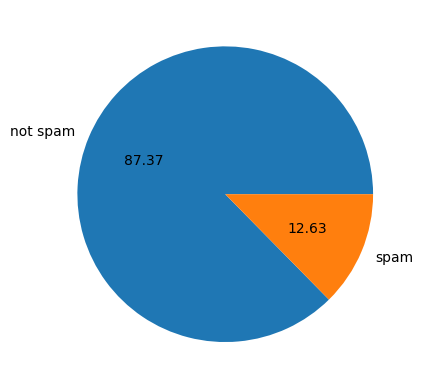

In [16]:
# No. of spams and not spams
plt.pie(x=df['target'].value_counts(), labels=['not spam', 'spam'], autopct='%0.2f')
plt.show()

#### Data is imbalanced. only 12.63% text are spam sms.

### Feature Augmentation
### Descriptive Analysis

In [17]:
df['num_chars'] = df['text'].apply(lambda x: len(x)) # getting the number of characters in each text
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x))) # number of words used
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) # number of sentences used

In [18]:
print('Descriptive analysis for not spam text:\n', df[df['target']==0].describe().T ,'\n')
print('='*100)
print('Descriptive analysis for spam text:\n', df[df['target']==1].describe().T)

Descriptive analysis for not spam text:
                 count       mean        std  min   25%   50%   75%    max
target         4516.0   0.000000   0.000000  0.0   0.0   0.0   0.0    0.0
num_chars      4516.0  70.459256  56.358207  2.0  34.0  52.0  90.0  910.0
num_words      4516.0  17.123782  13.493970  1.0   8.0  13.0  22.0  220.0
num_sentences  4516.0   1.820195   1.383657  1.0   1.0   1.0   2.0   38.0 

Descriptive analysis for spam text:
                count        mean        std   min    25%    50%    75%    max
target         653.0    1.000000   0.000000   1.0    1.0    1.0    1.0    1.0
num_chars      653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0
num_words      653.0   27.667688   7.008418   2.0   25.0   29.0   32.0   46.0
num_sentences  653.0    2.970904   1.488425   1.0    2.0    3.0    4.0    9.0


#### Spam texts tends to be longer, have more words and sentences on average compared to non spam texts.

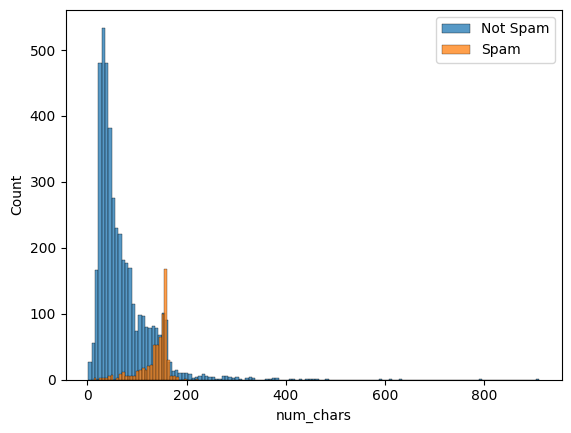

In [19]:
# No. of characters in spam VS non-spam sms
sns.histplot(df[df['target']==0], x='num_chars', label='Not Spam')
sns.histplot(df[df['target']==1], x='num_chars', label='Spam')
plt.legend()
plt.show()

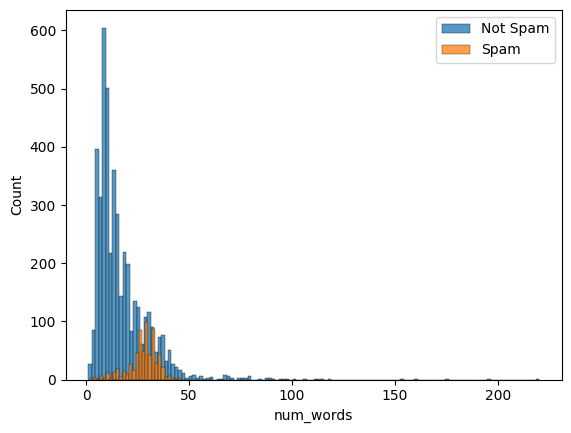

In [20]:
# No. of words in spam VS non-spam sms
sns.histplot(df[df['target']==0], x='num_words', label='Not Spam')
sns.histplot(df[df['target']==1], x='num_words', label='Spam')
plt.legend()
plt.show()

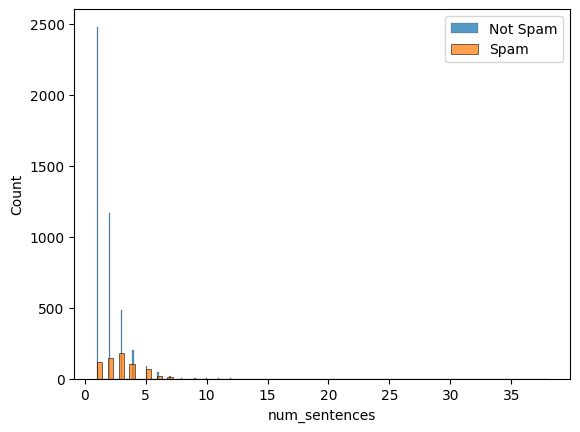

In [21]:
# No. of sentences in spam VS non-spam sms
sns.histplot(df[df['target']==0], x='num_sentences', label='Not Spam')
sns.histplot(df[df['target']==1], x='num_sentences', label='Spam')
plt.legend()
plt.show()

#### Same conclusion can be drawn through graphical representation as in descriptive analysis. Spam texts are longer and have more words and sentences than non spam texts.

## Text preprocessing

In [22]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\Zafar
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# create a function to preprocess the text

def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    filtered_words = [stemmer.stem(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)

In [25]:
df['clean_text'] = df['text'].apply(preprocess_text) # adding a column to store clean processed texts

In [26]:
df.head()

,target,text,num_chars,num_words,num_sentences,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### Now lets see the most frequent used words for spam and not spam texts.

In [27]:
from wordcloud import WordCloud
wc = WordCloud(width=600, height=400, min_font_size=8, background_color='white')

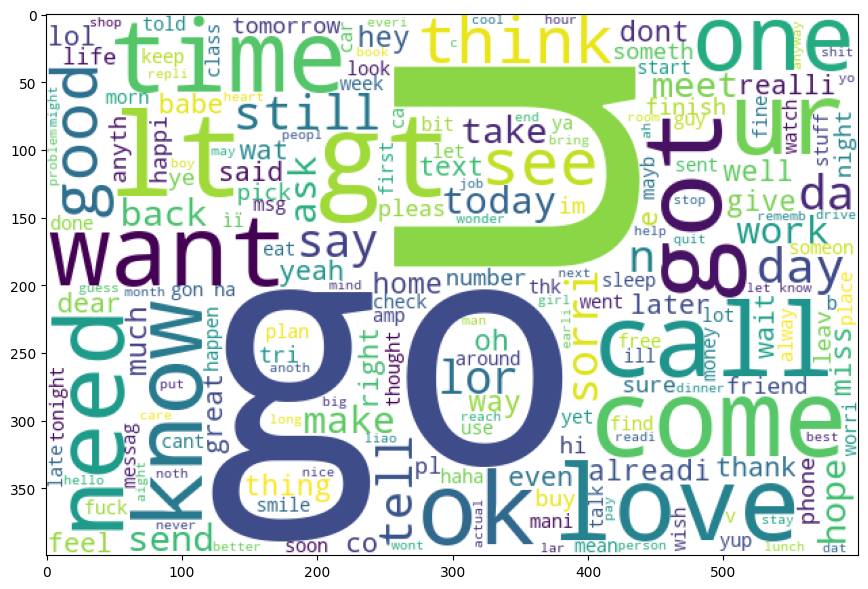

In [28]:
not_spam_wc = wc.generate(df[df['target']==0]['clean_text'].str.cat(sep=" "))
plt.figure(figsize=(10,6))
plt.imshow(not_spam_wc)
plt.tight_layout()
plt.show()

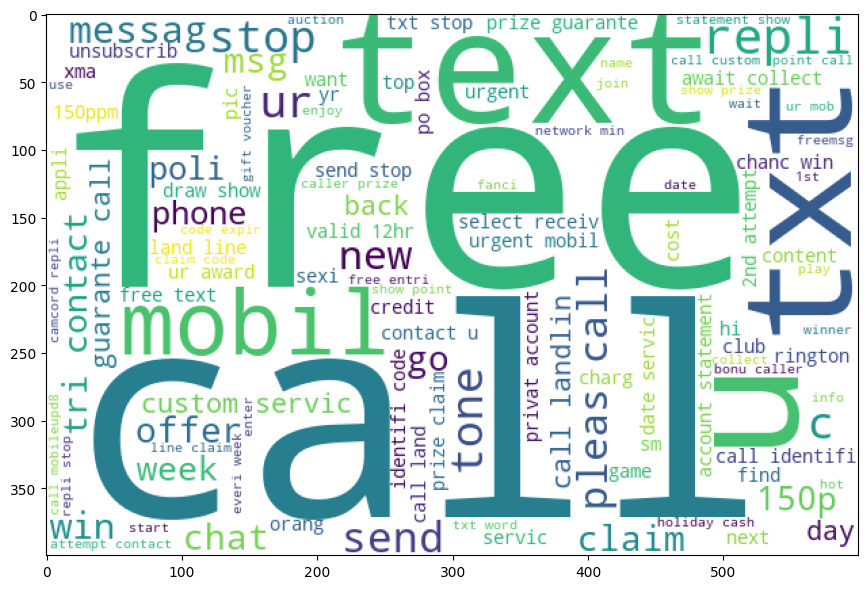

In [29]:
spam_wc = wc.generate(df[df['target']==1]['clean_text'].str.cat(sep=' '))
plt.figure(figsize=(10,6))
plt.imshow(not_spam_wc)
plt.tight_layout()
plt.show()

In [30]:
tfidf = TfidfVectorizer(max_features=3000)  
x = tfidf.fit_transform(df['clean_text']).toarray()
y = df['target']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, f1_score

In [33]:
# model training 
models = {'Naive Bayes': MultinomialNB(),
          'Logistic Regression': LogisticRegression(),
          'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
          'Support Vector machine': SVC(),
          'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
              
}

In [34]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    #report = classification_report(y_test, y_pred)
    #cm = confusion_matrix(y_test, y_pred)

    print(f'Model Name: {name}')
    print(f'Accuracy Score: {accuracy:.2f}')
    print(f'Precision Score: {precision:.2f}')
    print(f'F1 Score: {f1:.2f}')
    #print(f'Classification Report:\n', report)
    #print(f'Confusion Matrix:\n', cm)
    print('='*50)
    

Model Name: Naive Bayes
Accuracy Score: 0.97
Precision Score: 1.00
F1 Score: 0.88
Model Name: Logistic Regression
Accuracy Score: 0.96
Precision Score: 0.98
F1 Score: 0.81
Model Name: Random Forest
Accuracy Score: 0.97
Precision Score: 0.98
F1 Score: 0.89
Model Name: Support Vector machine
Accuracy Score: 0.97
Precision Score: 0.98
F1 Score: 0.89
Model Name: Gradient Boosting
Accuracy Score: 0.95
Precision Score: 0.92
F1 Score: 0.80


#### Naive Bayes has the best overall scores. We can perform some hyperparameter tuning to see if we can improve the model.

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
alpha_values = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 100.0]
param_grid = {'alpha': alpha_values}

In [37]:
random_grid = RandomizedSearchCV(estimator=MultinomialNB(), param_distributions=param_grid, cv=5, n_iter=20 ,scoring='accuracy')

In [38]:
random_grid.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_iter=20,
                   param_distributions={'alpha': [0.01, 0.1, 0.5, 1.0, 5.0,
                                                  10.0, 100.0]},
                   scoring='accuracy')

In [39]:
random_grid.best_params_ 

{'alpha': 0.1}

In [40]:
MNB = MultinomialNB(alpha=0.1)

In [41]:
MNB.fit(x_train, y_train)
y_pred_mnb = MNB.predict(x_test)

In [42]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_mnb)}')
print(f'Precision Score: {precision_score(y_test, y_pred_mnb)}')

Accuracy Score: 0.9806576402321083
Precision Score: 0.9682539682539683


#### With RandomizedSearchCV, we are getting alpha value that is improving accuracy at cost of precision. In this case Precision is more improtant. So we will proceed with the default alpha values ie. 1.0

In [43]:
best_MNB = MultinomialNB(alpha=1.0)

In [44]:
best_MNB.fit(x_train, y_train)

MultinomialNB()

In [45]:
new_data = 'Win 1OLakh/- cash on Zupee va1.in/N3-zp'

In [46]:
# Preprocess the new text string
preprocessed_text = preprocess_text(new_data)

# Transform the preprocessed text into a TF-IDF vector
new_text_vector = tfidf.transform([preprocessed_text])

# Use the trained Multinomial Naive Bayes model to make a prediction
prediction = best_MNB.predict(new_text_vector)

if prediction == 0:
    print('not spam')
else:
    print('spam')


spam


In [47]:
import pickle
pickle.dump(preprocess_text, open('preprocess_text.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(best_MNB, open('model.pkl','wb'))

In [48]:
!pip freeze > requirements.txt